# Predicted Chl_a of STIMP and baselines trained on imputed dataset at three locations

In [1]:
import h5py
import scipy
import numpy as np
import torch

In [ ]:
base_dir = "../log_bak/prediction/PRE/"
prediction_our = torch.from_numpy(np.load(base_dir+"STIMP/with_imputation/prediction.npy", allow_pickle=True))
prediction_xg_wo = torch.from_numpy(np.load(base_dir+"XGBoost/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_mtgnn = torch.from_numpy(np.load(base_dir+"MTGNN/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_mtgnn_wo
prediction_crossformer_wo = torch.from_numpy(np.load(base_dir+"CrossFormer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_tsmixer_wo = torch.from_numpy(np.load(base_dir+"TSMixer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_itransformer_wo = torch.from_numpy(np.load(base_dir+"iTransformer/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_predrnn_wo = torch.from_numpy(np.load(base_dir+"PredRNN/with_imputation/prediction_0.npy", allow_pickle=True))
prediction_pde = np.load("../data/PRE/cmoms.npy")

In [5]:
import pandas as pd
date = pd.date_range(start='2016-02-02', end='2022-02-10', freq='8D')
label = np.load("../data/PRE/trues.npy")
label_masks = np.load("../data/PRE/true_masks.npy")
index = [46*i for i in range(306//46)]
label_masks = label_masks.squeeze()
label = label.squeeze()
label = torch.from_numpy(label)
label_masks = torch.from_numpy(label_masks)


## Fig S10 (Left Column)

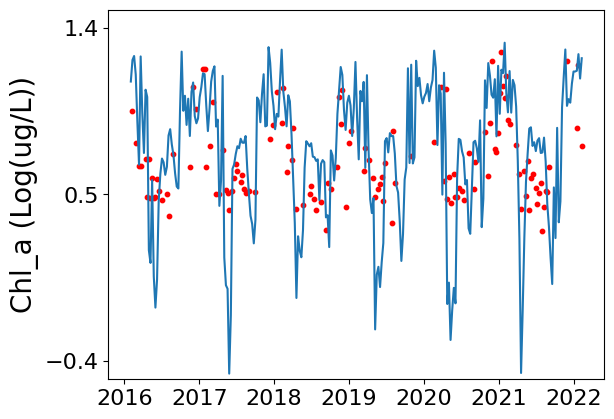

In [61]:
#CMOMS
from copy import deepcopy
import seaborn as sns
import matplotlib.pyplot as plt
n=803

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(date, predict, label="CMOMS")

plt.ylim(-0.5,1.5)
plt.xticks(fontsize=16)

plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

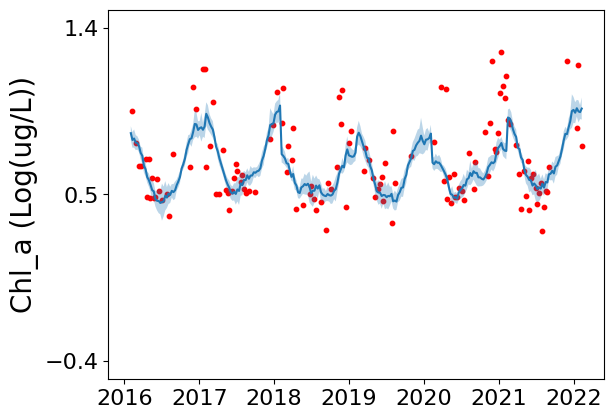

In [62]:
#STIMP
# predict = np.concatenate([prediction_our[i] for i in index], 1)[:,:, n]
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STIMP")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

plt.xticks(fontsize=16)
plt.yticks([])
plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

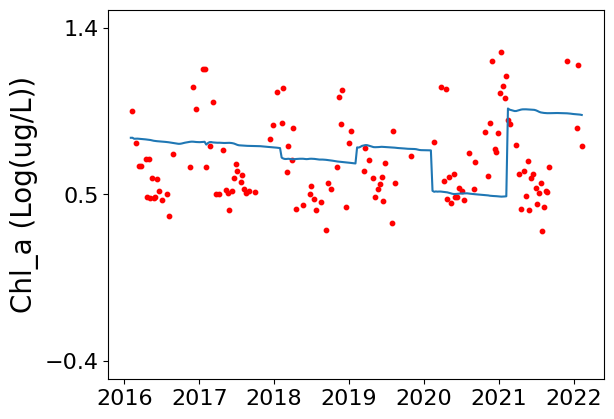

In [63]:
#PredRNN
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="PredRNN")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

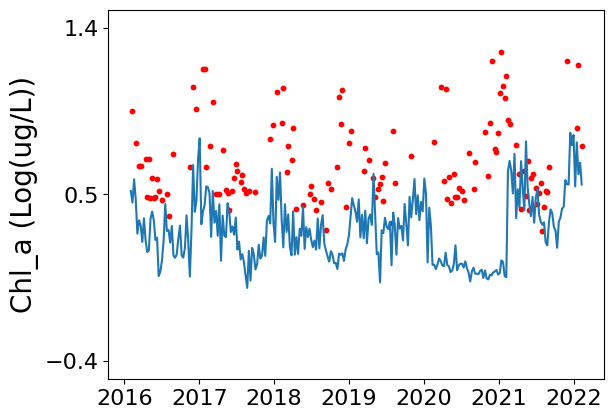

In [65]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_xg_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

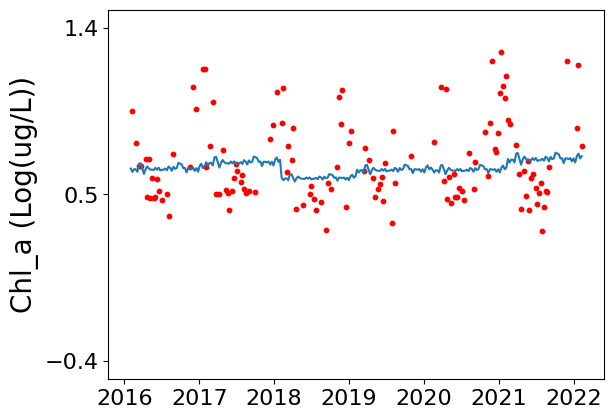

In [66]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_mtgnn_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

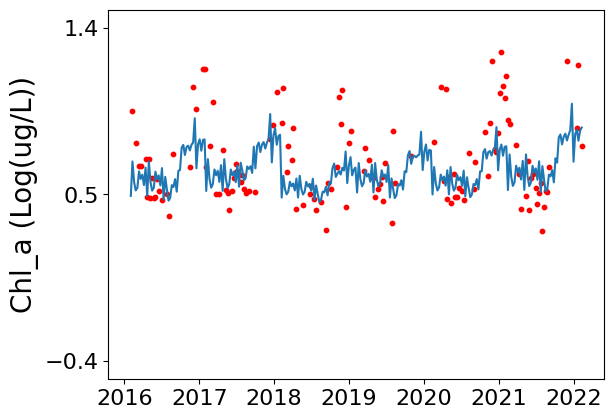

In [67]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_crossformer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

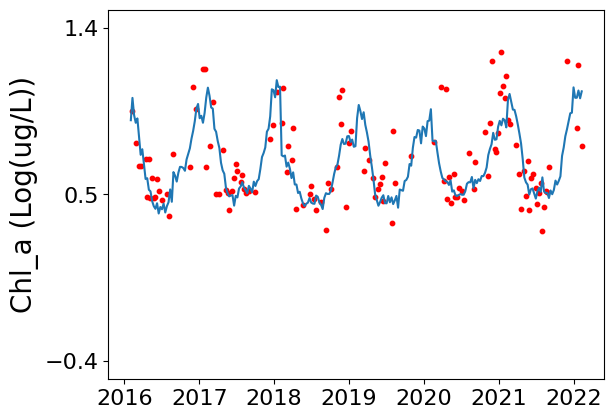

In [68]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_tsmixer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

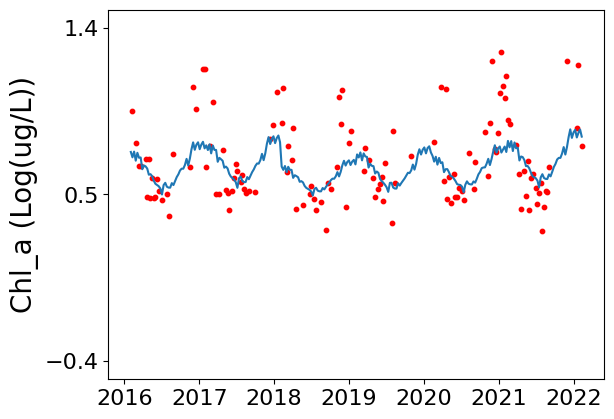

In [69]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_itransformer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-0.5,1.5)
plt.yticks([-0.4,0.5,1.4], fontsize=16)
plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

## Fig S10 (Middle Column)

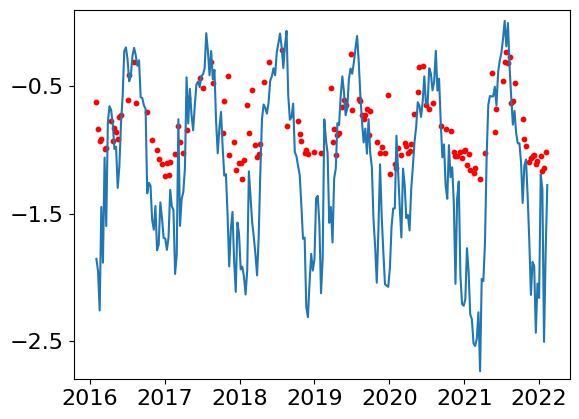

In [71]:
n=4006

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(date, predict, label="CMOMS")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

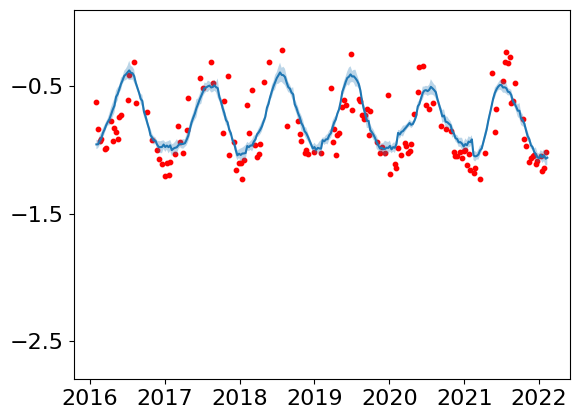

In [73]:
#STIMP
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STImp")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

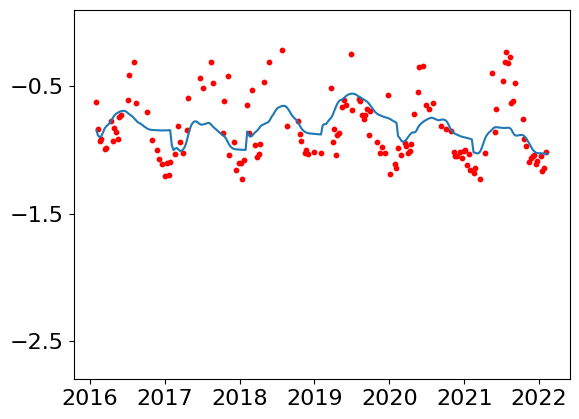

In [74]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(date, predict, label="STImp")

# plt.legend()
plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

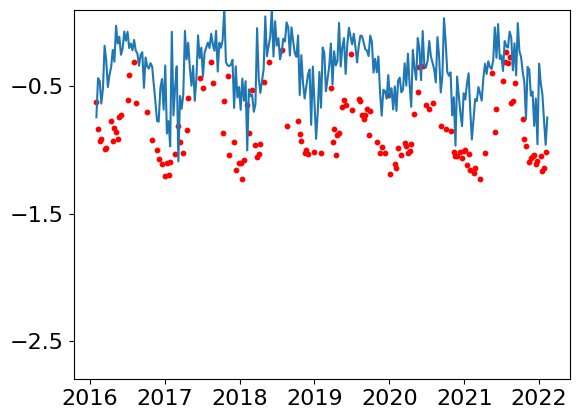

In [75]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_xg_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

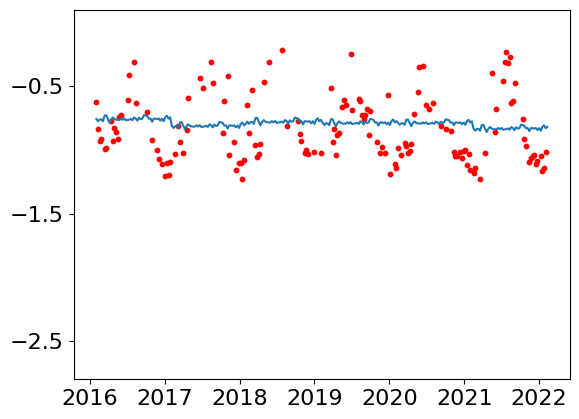

In [76]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_mtgnn_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

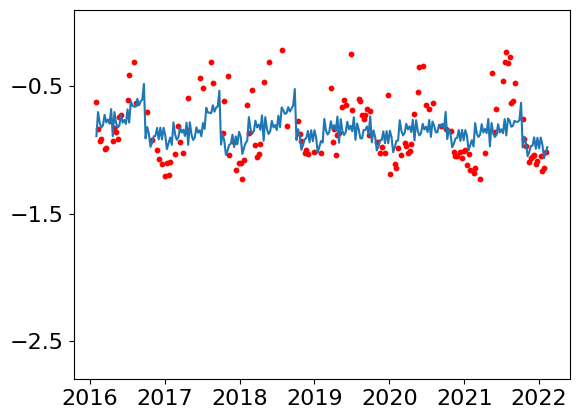

In [77]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_crossformer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

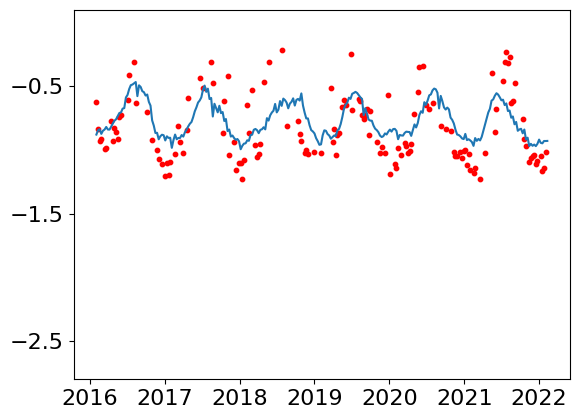

In [78]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_tsmixer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

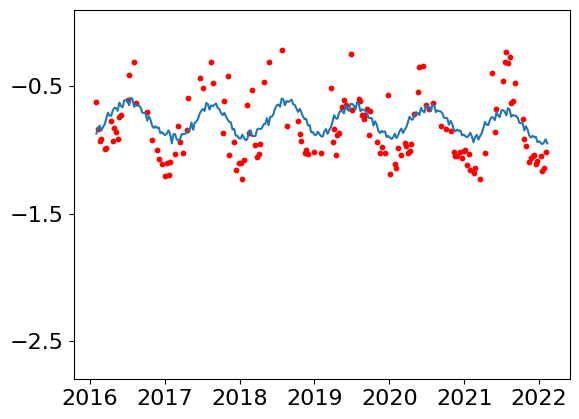

In [81]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_itransformer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.8,0.1)
plt.yticks(np.arange(-2.5, 0.5, 1), fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.xticks(fontsize=16)
plt.show()

## Fig S10 (Right Column)

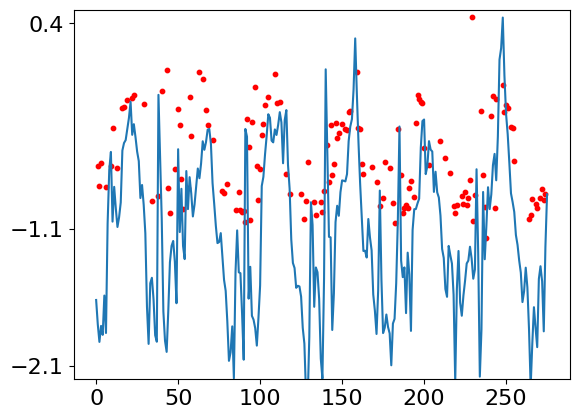

In [83]:
n=2667

index = [46*i for i in range(306//46)]
tmp  = deepcopy(label[index].reshape(276,-1))
tmp_mask  = deepcopy(label_masks[index].reshape(276,-1))
tmp[~tmp_mask.bool()]=np.nan
plt.scatter(np.arange(276), tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_pde[:276])
predict = predict[:,n]

plt.plot(np.arange(276), predict, label="CMOMS")

plt.ylim(-2.2,0.5)
plt.xticks(fontsize=16)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
# plt.ylabel("Chl_a (Log(ug/L))", fontsize=20)
plt.show()

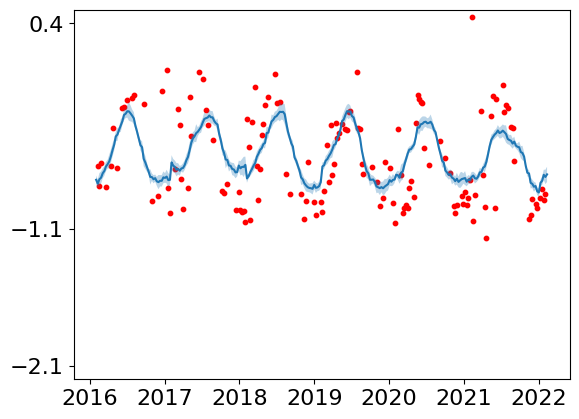

In [84]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_our[index].transpose(1,2).reshape(276,10,4443))
predict = predict[:,:,n]
mean = predict.mean(1)
std = predict.std(1)

plt.plot(date, mean, label="STImp")
plt.fill_between(date, mean-std, mean+std, alpha=0.3)

# plt.legend()
plt.xticks(fontsize=16)
plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.show()

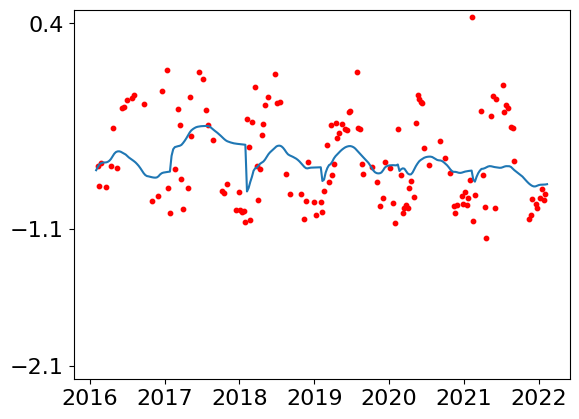

In [85]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")

predict = deepcopy(prediction_predrnn_wo[index].reshape(276,4443))
predict = predict[:,n]

plt.plot(date, predict, label="STImp")

# plt.legend()
plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.xticks(fontsize=16)
plt.show()

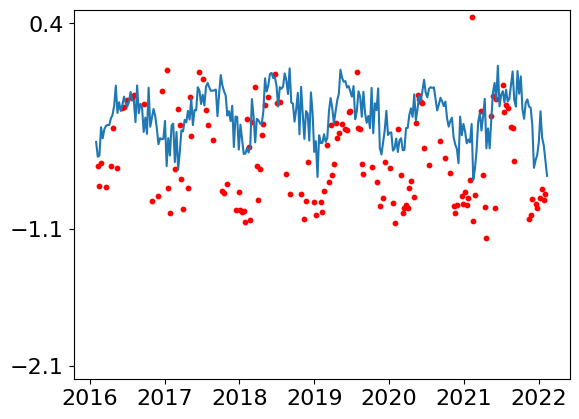

In [86]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_xg_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.xticks(fontsize=16)
plt.show()

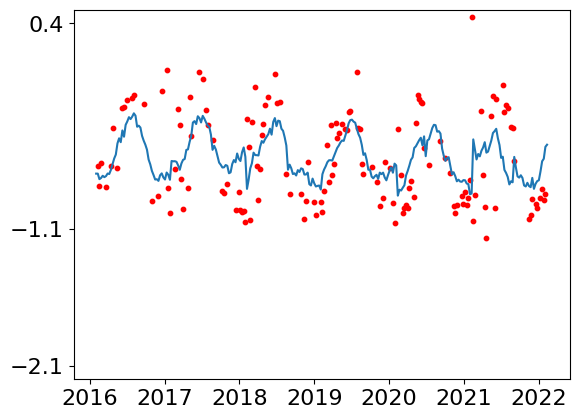

In [87]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_tsmixer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.xticks(fontsize=16)
plt.show()

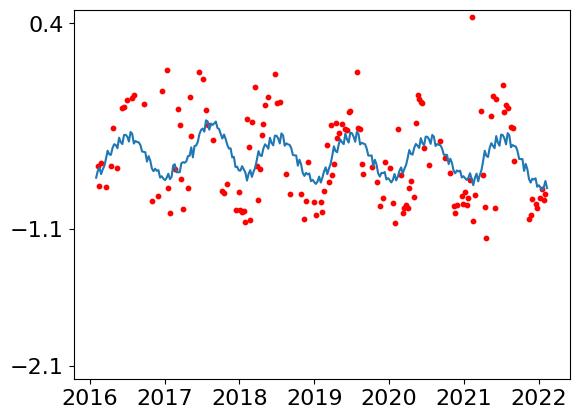

In [88]:
plt.scatter(date, tmp[:,n], c='red', s=10,label="Observed")
predict = deepcopy(prediction_itransformer_wo[index].reshape(276,4443))
predict = predict[:,n]
plt.plot(date, predict, label="")

plt.ylim(-2.2,0.5)
plt.yticks([-2.1,-1.1,0.4], fontsize=16)
plt.xticks(fontsize=16)
plt.show()